<a href="https://colab.research.google.com/github/Celso-Badu-Gomes/tcc-2023/blob/main/TCC_python_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TCC- Python-Pandas: Iniciando a análise dos dados do enem**

In [1]:
!pip install -U kaleido

In [2]:
#importando a biblioteca pandas
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
#lendo os dados da base e mostrando
pd.read_csv("/content/MICRODADOS_ENEM_2022.csv",sep=";", encoding="ISO-8859-1")

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666369,210057268927,2022,3,F,1,3,1,2,0,3,...,B,A,B,B,B,A,D,A,C,B
1666370,210057987886,2022,6,F,1,3,1,1,4,1,...,A,A,A,B,A,A,E,A,B,B
1666371,210056139144,2022,3,F,1,1,1,2,0,2,...,A,A,A,B,B,B,C,A,B,B
1666372,210057158561,2022,2,M,1,3,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B


In [4]:
#mostrando as colunas da base de dados
dados = pd.read_csv("/content/MICRODADOS_ENEM_2022.csv",sep=";", encoding="ISO-8859-1", nrows = 0)
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [5]:
#aqui posso escolhaer apenas as colunas que irei usar na analise
columns = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA','TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [6]:
dados = pd.read_csv("/content/MICRODADOS_ENEM_2022.csv",sep=";", encoding="ISO-8859-1", usecols=columns)
dados.columns.values

array(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q01

In [7]:
#mostrando a quantidade de inscritos em 2022
print('quantidade de incritos no enem de 2022: ',dados.shape[0])

quantidade de incritos no enem de 2022:  1666374


In [8]:
#contando o total de inscritos e tirando os treineiros
numero_de_treineiros = dados[dados['IN_TREINEIRO'] == 1].shape[0]
numero_de_nao_treineiros = dados[dados['IN_TREINEIRO'] == 0].shape[0]

In [9]:
print(f"Total de treineiros no Enem 2022: {numero_de_treineiros}")
print(f"Total de não treineiros no Enem 2022: {numero_de_nao_treineiros}")

Total de treineiros no Enem 2022: 169160
Total de não treineiros no Enem 2022: 1497214


In [10]:
#contando o total de homens, excluindo os trneiros

#selecao dos candidatos não treineiros.
candidatos_nao_treineiros = dados[dados['IN_TREINEIRO'] == 0]

# Candidatos do sexo masculino dentro do grupo de não treineiros.
candidatos_homens_nao_treineiros = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'M']

# número de candidatos que atendem a essa condição.
total_homens_nao_treineiros = candidatos_homens_nao_treineiros.shape[0]

print(f"Total de candidatos não treineiros do sexo masculino: {total_homens_nao_treineiros}")


Total de candidatos não treineiros do sexo masculino: 528300


In [11]:
#contando o total de mulheres, excluindo as treneiras

# Máscara para selecionar candidatos não treineiros.
candidatos_nao_treineiros = dados[dados['IN_TREINEIRO'] == 0]

# Mascara para selecionar candidatos do sexo feminino dentro do grupo de não treineiros.
candidatos_mulheres_nao_treineiros = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'F']

# Número de candidatos que atendem a essa condição.
total_mulheres_nao_treineiros = candidatos_mulheres_nao_treineiros.shape[0]


In [12]:
print(f"Total de candidatos não treineiros do sexo feminino: {total_mulheres_nao_treineiros}")


Total de candidatos não treineiros do sexo feminino: 968914


In [13]:
# dando um apanhado geral nas medias

# Máscara para selecionar candidatos não treineiros.
candidatos_nao_treineiros = dados[dados['IN_TREINEIRO'] == 0]

# Média geral das notas para candidatos não treineiros.
media_geral = candidatos_nao_treineiros['NU_NOTA_CN'].mean()

# Média das notas para candidatos do sexo masculino dentro do grupo de não treineiros.
media_masculino = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'M']['NU_NOTA_CN'].mean()

# Média das notas para candidatas do sexo feminino dentro do grupo de não treineiros.
media_feminino = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'F']['NU_NOTA_CN'].mean()


print(f"Média geral das notas para candidatos não treineiros: {media_geral:.2f}")
print(f"Média das notas para candidatos do sexo masculino não treineiros: {media_masculino:.2f}")
print(f"Média das notas para candidatas do sexo feminino não treineiras: {media_feminino:.2f}")

Média geral das notas para candidatos não treineiros: 493.68
Média das notas para candidatos do sexo masculino não treineiros: 505.20
Média das notas para candidatas do sexo feminino não treineiras: 487.41


In [14]:
#meida das notas dos dois sexos

# Máscara para selecionar candidatos não treineiros.
candidatos_nao_treineiros = dados[dados['IN_TREINEIRO'] == 0]

# Média das notas para candidatos do sexo masculino dentro do grupo de não treineiros.
media_notas_masculino = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'M']['NU_NOTA_CN'].mean()

# Média das notas para candidatas do sexo feminino dentro do grupo de não treineiros.
media_notas_feminino = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'F']['NU_NOTA_CN'].mean()


In [15]:
candidatos_nao_treineiros

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,1,1,NaN,0,NaN,NaN,NaN,...,B,A,A,A,A,A,A,A,A,A
1,14,M,1,1,1,NaN,0,NaN,NaN,NaN,...,E,E,B,E,B,B,E,B,E,B
2,5,F,2,1,1,NaN,0,NaN,NaN,NaN,...,A,A,A,A,A,A,C,A,A,B
3,6,M,3,1,1,NaN,0,NaN,NaN,NaN,...,B,A,A,C,A,A,C,B,B,B
4,4,M,3,1,1,NaN,0,NaN,NaN,NaN,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666369,3,F,3,2,3,NaN,0,2910800.0,Feira de Santana,29.0,...,B,A,B,B,B,A,D,A,C,B
1666370,6,F,3,1,1,NaN,0,NaN,NaN,NaN,...,A,A,A,B,A,A,E,A,B,B
1666371,3,F,1,2,2,1.0,0,4314902.0,Porto Alegre,43.0,...,A,A,A,B,B,B,C,A,B,B
1666372,2,M,3,2,2,1.0,0,5300108.0,Brasília,53.0,...,B,A,A,B,A,A,D,A,B,B


In [16]:
print(f"Média das notas de candidatos do sexo masculino não treineiros: {media_notas_masculino:.2f}")
print(f"Média das notas de candidatas do sexo feminino não treineiras: {media_notas_feminino:.2f}")

Média das notas de candidatos do sexo masculino não treineiros: 505.20
Média das notas de candidatas do sexo feminino não treineiras: 487.41


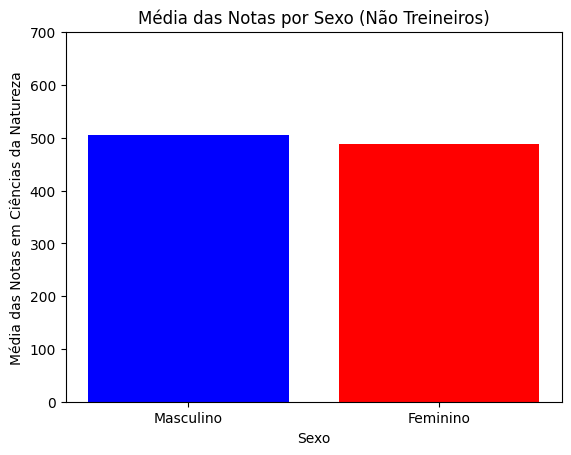

In [18]:
import matplotlib.pyplot as plt

# Máscara para selecionar candidatos não treineiros.
candidatos_nao_treineiros = dados[dados['IN_TREINEIRO'] == 0]

# Média das notas para candidatos do sexo masculino dentro do grupo de não treineiros.
media_masculino = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'M']['NU_NOTA_CN'].mean()

# Média das notas para candidatas do sexo feminino dentro do grupo de não treineiros.
media_feminino = candidatos_nao_treineiros[candidatos_nao_treineiros['TP_SEXO'] == 'F']['NU_NOTA_CN'].mean()

# listas para os valores das médias e os rótulos dos grupos.
medias = [media_masculino, media_feminino]
rotulos = ['Masculino', 'Feminino']

# gráfico de barras.
plt.bar(rotulos, medias, color=['blue', 'red'])
plt.xlabel('Sexo')
plt.ylabel('Média das Notas em Ciências da Natureza')
plt.title('Média das Notas por Sexo (Não Treineiros)')
plt.ylim(0, 700)


plt.show()
